# STEP 1 extract data from a database using SQL



to extract the data using SQL:
### for the city:
select  city,year,avg_temp from city_data where country='Algeria' order by 1;
### for the globale:
select  * from global_data ;


# STEP 2 manipulate data

I'am using the pandas librery to manipulate the data in the csv files


In [2]:
import pandas as pd

fist we will load the data from the files into a DataFrame object using the read_csv function in pandas

In [3]:
localTempDF = pd.read_csv('cityresults.csv')
globalTempDF = pd.read_csv('Globalresults.csv')

take a look at the data to see if evryting is loaded properly using the head() function to print the first 5 row in DF 

In [14]:
globalTempDF.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


delete the 'city' comlumn form the dataFrame 'probebly I shouldn't load it in the first place with the csv'

In [104]:
del localTempDF['city']

now we calculate the Moving averages  to be used in the line chart :we used __5-year__ moving avrege i've tried with __10-year__ and __20-year__ but from the line chart __5-year__ seems to give the best visuel result

In [4]:
localTempDF['mavg_temp']=localTempDF['avg_temp'].rolling(window=5).mean()
globalTempDF['mavg_temp']=globalTempDF['avg_temp'].rolling(window=5).mean()


In [16]:
localTempDF.head(1)

,year,avg_temp,mavg_temp
0,1753,16.44,NaN


we replace the 'NaN' values in each line   with the the __avg_temp__ value in the same line 

In [5]:
localTempDF.mavg_temp.fillna(localTempDF.avg_temp, inplace=True)
del localTempDF['avg_temp']

In [6]:
globalTempDF.mavg_temp.fillna(globalTempDF.avg_temp, inplace=True)
del globalTempDF['avg_temp']

we use the query fonction to delete the rows in *globalTempDF* where the year is in  **[1750,1751,1752,2014,2015]** because those years are not in the *localTempDF* that's we cause some error when ploting the data

In [7]:
globalTempDF = globalTempDF.query('year  not in [1750,1751,1752,2014,2015]')

In [79]:
globalTempDF.head(2)

,year,mavg_temp
3,1753,8.39
4,1754,8.47


In [ ]:
localTempDF.head(2)

extract the year values and **mavg_temp** for both local and global as **numpy** array to use them in the plot

In [8]:
x = localTempDF['year'].values

In [9]:
y_1=localTempDF['mavg_temp'].values

In [10]:
y_2=globalTempDF['mavg_temp'].values

In [11]:
len(y_2)==len(y_1)

True

we will use the matplotlib to plot the line Chart

In [1]:
import matplotlib.pyplot as plt

Text(0.5,1,'the changes in global and local avreges temperatures from 1753 to 2013')

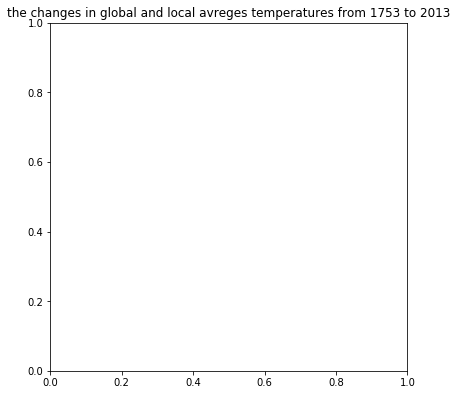

In [12]:
plt.figure(figsize=(6.4, 6.4))


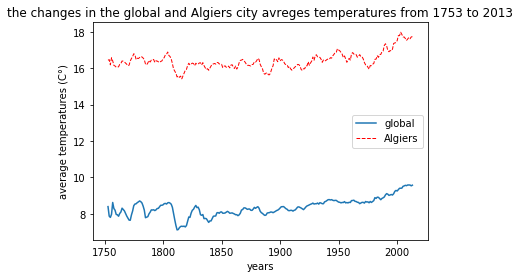

In [18]:
plt.plot(x, y_2, label='global')
plt.plot(x, y_1,color='red',linewidth=1.0, linestyle='--',label='Algiers')
plt.xlabel('years')
plt.ylabel('average temperatures (C°)')
plt.legend()
plt.title("the changes in the global and Algiers city avreges temperatures from 1753 to 2013")
plt.show()


In [159]:
import numpy as np

In [162]:
np.corrcoef(y_1,y_2)[0,1]

0.8548247651883328

# STEP 3 Observation


  - as we can see the correlation coefficient is near **0.855** so the values of the tow observation of temperature ar positively correlated if the global avrege temperature change the avrege local temperature change in the same direction.
  - we can see from the line Chart that the global avrege temperature increased by one  degree (C°) from 1900 to 2013.
  - we see that the both global and local avrege temperature reached a peak in the last couple of year say from the start of the 2000's.
  - we can see from the Chart that the decade 1810-1820 was the coldest decade in the observation that beceause of 'Tambora (1815) and another (1809) stratospheric volcanic eruption'.